## Assignments

To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below

### 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of [this dataset from Kaggle](https://www.kaggle.com/budincsevity/szeged-weather). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:

```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
```

As in earlier assignments, be sure to close the database connection after initially pulling in your data.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.22,7.11,0.85,13.96,258.00,14.96,0.00,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.73,5.52,0.95,12.36,259.00,9.98,0.00,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.77,6.53,0.89,14.15,260.00,9.98,0.00,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.82,10.82,0.82,11.32,259.00,9.98,0.00,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.77,13.77,0.72,12.53,279.00,9.98,0.00,1017.22,Partly cloudy throughout the day.


* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.

In [3]:
# use scikit-learn

# Y is the target variable
Y = df['temperature']
# X is the feature set which includes
# is_male and is_smoker variables
X = df[['humidity','windspeed', 'windbearing', 'pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285406


* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

## Assumption one: linearity of the model in its coefficients



In principle, this assumption is not related to estimation but to how we specify our model. So as long as we use models that take into account this linearity assumption as we did in our medical costs example, then we shouldn't worry about this assumption at all.

## Assumption two: the error term should be zero on average


In [5]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -1.697293462299017e-16


Since, we include the constant term in the model, the average of the model's error is effectively zero.

## Assumption three: homoscedasticity

method 1. visulization.

Let's checkout whether our medical costs model suffers from heteroscedasticity by visualizing it:

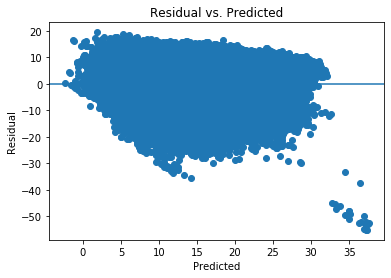

In [6]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

It seems that error variance is consistent for most of the part, except that it is higher for the higher values of the target variable. This implies that our error terms are mostly homoscedastic. But better check with other methods as well.

Besiede, visulization. We can use statsitial method to check homoscedasitcity. Here we demonstrate two of them: **Bartlett** and **Levene** tests. The null hypothesis for both tests is that the errors are homoscedastic. Both tests can be imported from scipy's stats module.

In [8]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

### discussion

There may be several causes of heteroscedasticity. Examples include outliers in the data and omitted variables that are important in explaining the variance of the target variable. Dealing with outliers and including relevant variables help to fix the heteroscedasticity problem. Some fixes to heteroscedasticity include transforming the dependent variable (see [Box Cox transformation](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/) and [log transformation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)) and adding features that target the poorly-estimated areas. 


## Assumption four: low multicollinearity

we care about the absolute value of correalation coefficients, and it is easier to visulize from the heat map.

also, since we don't have categorical variables as features. The continous variables are the only thing we need to concern

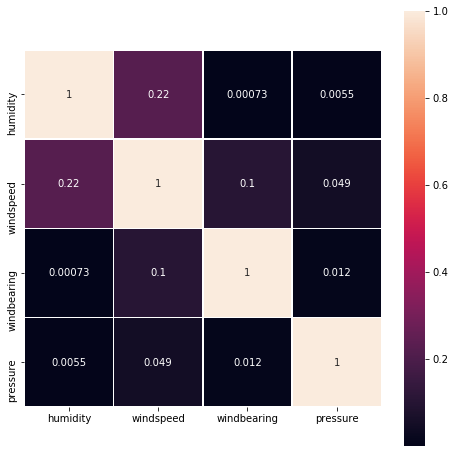

In [12]:
corr_matrix = np.abs(X.corr())
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5)
plt.show()

It seems like the non-colinearity assumption met

## Assumption five: error terms should be uncorrelated with one another

Error terms should be uncorrelated with one another. In other words, the error term for one observation shouldn't predict the error term for another. This type of serial correlation may happen if we omit a relevant variable from the model. So, including that variable into the model can solve for this issue. 

To identify whether the error terms are correlated with each other or not, we can graph them. In the graph, we need to observe randomness.

Let's check our medical costs model's errors:

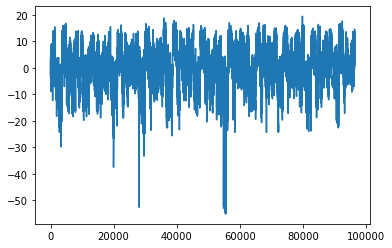

In [13]:
plt.plot(errors)
plt.show()

I am not very good at reading the serial correlation plot, so let's try another way.

Another way to look at correlations between errors is to use the **autocorrelation function**. This function computes the correlation of a variable with itself. 

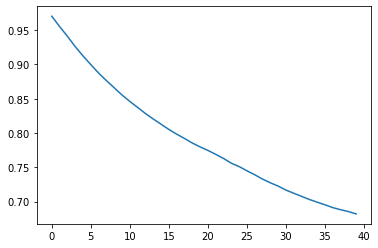

In [14]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our medical costs model is somewhat high(ranging between 0.65 and 0.98).

## Assumption six: features shouldn't be correlated with the errors

we can check the correlation coefficient between features and error and visulaizae that with heat map (just focus on the first column (or first row).

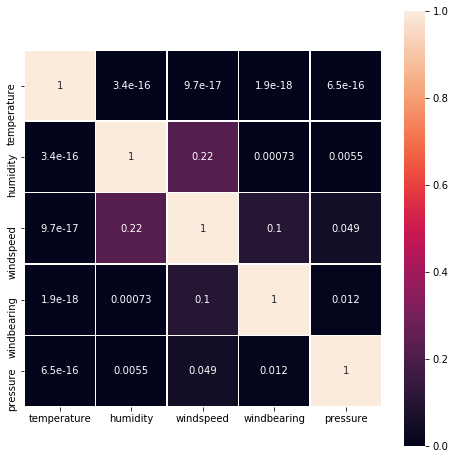

In [20]:
df_error_corr = pd.concat([errors, X], axis=1)

corr_matrix_error = np.abs(df_error_corr.corr())
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix_error, square=True, annot=True, linewidths=.5)
plt.show()

# df_encoded

It seems that this assumption met, since the correlation coefficient is very low. 

## <font color=red>A very important remark on the normality of the errors</font>

There are various ways to check for normality of error terms. An informal way of doing this is by visualizing the errors in a QQ plot or to look at the histogram:

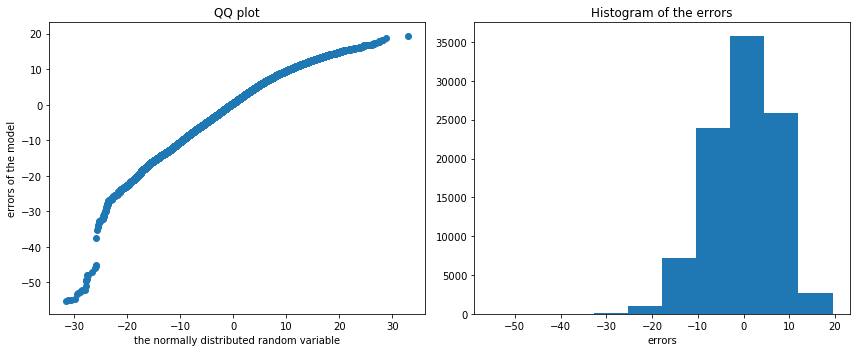

In [21]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

While visualizations give us a first impression about normality, the best way to learn about this is to apply formal statistical tests. To this end, we use two of them from scipy's stats module: **Jarque Bera** and **normal** tests. The null hypothesis of both tests is that the errors are normally distributed.

Let's use these tests to find out whether our error terms are normally distributed or not:

In [22]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [23]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252367 and p value is 0.0
Normality test statistics is 3375.432307699584 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.

### 2. House prices

* Load the **houseprices** data from Thinkful's database. 
* Reimplement the model you built in the previous checkpoint. 
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
*  be sure to close the database connection after initially pulling in your data.

big question: how to check the assumption for categorical variables??? (the bootcamp material just illustrate on continous varialbes.)